In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report


In [2]:
data_dir = r"C:\Users\18138\Desktop\data anly\Training Image sp 23"
classes = os.listdir(data_dir)
images = []
labels = []
for class_id, class_name in enumerate(classes):
    class_dir = os.path.join(data_dir, class_name)
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale
        img = cv2.resize(img, (224, 224))
        images.append(img)
        labels.append(class_id)

In [3]:
images = np.array(images)
labels = np.array(labels)

print(len(images))
print(len(labels))

1838
1838


In [4]:
X_train, X_valid, y_train, y_valid = train_test_split(images, labels, test_size=0.2, random_state=42)


In [5]:
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape) 

(1470, 224, 224)
(1470,)
(368, 224, 224)
(368,)


In [6]:
from skimage.feature import local_binary_pattern
from skimage.color import rgb2gray

train_features = []
for img in X_train:
    lbp = local_binary_pattern(img, 8, 1)
    hist, _ = np.histogram(lbp, bins=np.arange(0, 257), density=True)
    train_features.append(hist)
train_features = np.array(train_features)
    
valid_features = []
for img in X_valid:
    lbp = local_binary_pattern(img, 8, 1)
    hist, _ = np.histogram(lbp, bins=np.arange(0, 257), density=True)
    valid_features.append(hist)
valid_features = np.array(valid_features)




In [7]:
from sklearn import svm

model = svm.SVC(kernel='rbf', C=100,gamma='scale')  #removing degree getting best accuracy
model.fit(train_features, y_train)
y_pred = model.predict(valid_features)
val_accuracy = accuracy_score(y_valid, y_pred)
print('Accuracy:', val_accuracy*100)

Accuracy: 48.641304347826086


In [8]:
import joblib
joblib.dump(model, 'svm_classifier_model.pkl')

['svm_classifier_model.pkl']

In [9]:
clf = joblib.load('svm_classifier_model.pkl')

In [10]:
# data_dir = r"C:\Users\18138\Desktop\data anly\Test Image sp 23"
# classes = os.listdir(data_dir)
# images = []
# labels = []
# for class_id, class_name in enumerate(classes):
#     class_dir = os.path.join(data_dir, class_name)
#     for img_name in os.listdir(class_dir):
#         img_path = os.path.join(class_dir, img_name)
#         img = cv2.imread(img_path)
#         img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale
#         img = cv2.resize(img, (224, 224))
#         images.append(img)
#         labels.append(class_id)

In [11]:
data_dir = r"C:\Users\18138\Desktop\data anly\Test Image sp 23"
classes = os.listdir(data_dir)
images = []
labels = []
image_names = []  # create a list to store the image names
for class_id, class_name in enumerate(classes):
    class_dir = os.path.join(data_dir, class_name)
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale
        img = cv2.resize(img, (224, 224))
        images.append(img)
        labels.append(class_id)
        image_names.append(img_name)

In [12]:
print(len(labels))
print(labels)


480
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,

In [13]:
test_images = np.array(images)
test_labels = np.array(labels)

In [14]:
test_features = []
for img in test_images:
    lbp = local_binary_pattern(img, 8, 1)
    hist, _ = np.histogram(lbp, bins=np.arange(0, 257), density=True)
    test_features.append(hist)
test_features = np.array(test_features)

In [15]:
y_pred_test = clf.predict(test_features)
test_accuracy = accuracy_score(test_labels, y_pred_test)
print('Accuracy:', test_accuracy*100)

Accuracy: 43.125


In [16]:
classes = ['Adult', 'Airplane', 'Alpaca','Bird', 'Bus','Car', 'Cat', 'Child','Elephant', 'Flower','Giraffe', 'Horse','Monkey', 'Panda', 'Reptile','Vessel']
print(classification_report(test_labels,y_pred_test,target_names=classes))

              precision    recall  f1-score   support

       Adult       0.22      0.30      0.25        30
    Airplane       0.53      0.67      0.59        30
      Alpaca       0.43      0.67      0.52        30
        Bird       0.28      0.17      0.21        30
         Bus       0.89      0.80      0.84        30
         Car       0.62      0.53      0.57        30
         Cat       0.27      0.40      0.32        30
       Child       0.29      0.17      0.21        30
    Elephant       0.28      0.43      0.34        30
      Flower       0.47      0.47      0.47        30
     Giraffe       0.60      0.40      0.48        30
       Horse       0.45      0.17      0.24        30
      Monkey       0.36      0.33      0.34        30
       Panda       0.40      0.47      0.43        30
     Reptile       0.48      0.37      0.42        30
      Vessel       0.63      0.57      0.60        30

    accuracy                           0.43       480
   macro avg       0.45   

In [17]:
y_pred_test

array([ 6,  0,  9,  6,  9,  0,  7,  0, 13,  0,  7,  9,  0,  6,  0, 13,  0,
        7,  7,  0, 12,  7,  0, 11, 12,  8,  9,  9,  9, 12, 15,  1,  3,  1,
        1,  1,  1,  1,  1,  1,  1,  3,  1,  1,  1,  1, 14,  3,  1,  1, 15,
        1,  9,  0,  3,  1,  1,  1,  1,  3,  2,  2,  6,  2,  2,  2,  4, 10,
        8,  2, 15,  2, 12,  2,  2,  2,  8,  2,  2, 10,  2, 13,  2,  2,  2,
        2,  2,  2,  2, 13, 12,  9,  6,  1,  8,  3,  1, 15, 10,  6,  6,  3,
        6, 14,  3,  1,  1,  1,  3,  6,  2, 15,  1,  0,  1,  9,  1,  3,  0,
        6,  4,  0,  4,  4,  4,  4,  4,  5,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  5,  4,  4,  4,  5,  4,  1,  4,  4,  5,  4,  4,  4,  5, 15,  5,
        2, 15,  0,  5, 15,  1,  1,  5,  5, 15,  5,  6,  3,  1,  5, 15,  5,
        0,  5,  5,  5,  5,  5,  5,  5,  1,  5,  6, 12,  6, 13, 13, 14,  6,
       13,  6,  7,  0,  2,  6,  6,  0, 12,  6,  0,  0,  0,  6, 12,  2,  6,
        6, 13,  6,  6, 12,  2,  7,  5,  8,  0,  6,  6,  0,  0,  7,  6,  0,
        7,  6,  7,  0,  0

In [18]:
# test_label=[i[1] for i in test_data]
# print(test_label)

In [19]:
# test_imgname=[i[2] for i in test_data]
# print(test_imgname)

In [20]:
data = { 'GIVEN IMAGE NAME':image_names , 'GIVEN TEST CLASS': labels, 'PREDICTED CLASS': y_pred_test}
df = pd.DataFrame(data)
df.to_csv("SVM_WITHOUT_PRETRAINED.csv", index=False)

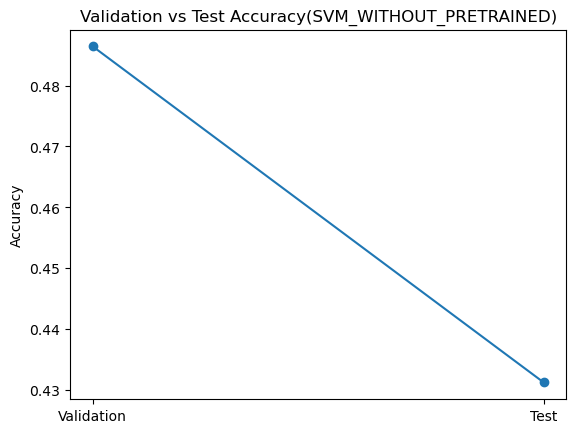

In [21]:
plt.plot([1, 2], [val_accuracy, test_accuracy], marker='o')
plt.xticks([1, 2], ['Validation', 'Test'])
plt.ylabel('Accuracy')
plt.title('Validation vs Test Accuracy(SVM_WITHOUT_PRETRAINED)')
plt.show()

In [22]:
from sklearn.metrics import confusion_matrix
import numpy as np

cm = confusion_matrix(test_labels, y_pred_test)
print(cm)


[[ 9  0  0  0  0  0  3  5  1  6  0  1  3  2  0  0]
 [ 1 20  0  5  0  0  0  0  0  1  0  0  0  0  1  2]
 [ 0  0 20  0  1  0  1  0  2  0  2  0  1  2  0  1]
 [ 2  8  1  5  0  0  6  0  1  2  1  0  1  0  1  2]
 [ 1  1  0  0 24  4  0  0  0  0  0  0  0  0  0  0]
 [ 2  4  1  1  0 16  1  0  0  0  0  0  0  0  0  5]
 [ 5  0  3  0  0  0 12  1  0  0  0  0  4  4  1  0]
 [14  0  0  0  0  4  4  5  1  0  0  0  2  0  0  0]
 [ 1  0  9  0  0  1  1  0 13  0  1  1  0  2  1  0]
 [ 2  1  0  1  0  0  2  1  2 14  0  1  5  0  1  0]
 [ 0  0  3  1  1  1  0  0  7  0 12  2  1  2  0  0]
 [ 1  0  2  0  0  0  3  1 16  1  0  5  0  0  1  0]
 [ 1  0  4  1  0  0  4  0  0  1  0  0 10  5  4  0]
 [ 2  0  1  1  0  0  5  3  1  1  0  0  0 14  2  0]
 [ 0  1  3  0  0  0  3  1  1  1  4  0  1  4 11  0]
 [ 0  3  0  3  1  0  0  0  2  3  0  1  0  0  0 17]]


In [23]:
print(len(image_names))

480
